<a href="https://colab.research.google.com/github/singhr08-cpu/Test/blob/main/BlueSky_Booking_Systems_solution_Q1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BlueSky Airlines Booking Systems

In [1]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Known data for the problem
Capacity = 200           # plane capacity (# of seats)
Booking_Limit_SS = 120   # booking limit for SS class

Price_FF = 850   # price for SS (Super Saver)
Price_SS = 350   # price for FF (Full Fare)

In [3]:
# read the data from an Excel file
df = pd.read_csv("BlueSky_Demand_Data.csv", index_col = 0)
display(df)

,Demand_SS,Demand_FF
0,170,63
1,137,45
2,188,83
3,123,21
4,21,38
...,...,...
995,185,71
996,133,53
997,123,60
998,103,82


# Q1
## Calculate the mean and standard deviation of demands

In [4]:
# set up the demands equal to the mean of the distribution
mean_SS = np.mean(df["Demand_SS"])
mean_FF = np.mean(df["Demand_FF"])

# set up the demands equal to the mean of the distribution
std_SS = np.std(df["Demand_SS"])
std_FF = np.std(df["Demand_FF"])

# print the results
print(f"The mean SS demand is {mean_SS:.2f} and stdev for SS demand {std_SS:,.2f}")
print(f"The mean FF demand is {mean_FF:.2f} and stdev for FF demand {std_FF:,.2f}")

The mean SS demand is 129.55 and stdev for SS demand 44.67
The mean FF demand is 55.43 and stdev for FF demand 19.94


## Scatter plot of demands

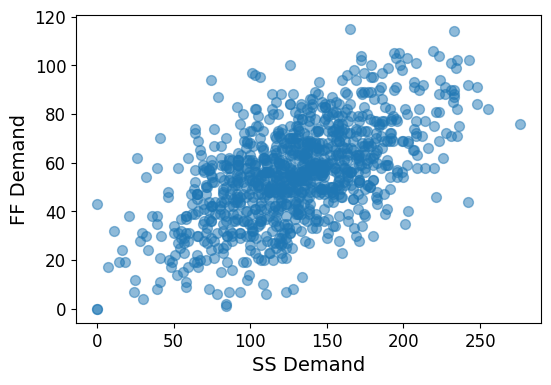

In [5]:
# Scatter plot of price and demand
plt.figure(figsize=(6,4))
plt.scatter(x=df["Demand_SS"], y=df["Demand_FF"], marker='.', s=200, alpha=0.5)
plt.xlabel("SS Demand", fontsize=14)
plt.ylabel("FF Demand", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

Clearly, the demands are positively correlated. We can even calculate the correlation coefficient:

In [6]:
# calculate and print the correlation coefficient
print(f'The correlation coefficient: {df["Demand_FF"].corr(df["Demand_SS"]):.2f}')

The correlation coefficient: 0.57


# Q2

We define a function to calculate the revenue below. There are a few steps:
 1. We first calculate the sales (i.e., the number of bookings) for each fare class. The bookings for SS cannot exceed the **booking limit for SS**, so the expression for these is:<br>
  $\mbox{Sales SS} = \min(\mbox{Demand SS}, \mbox{Booking Limit SS})$
 2. In view of this, the number of seats that remain available for FF is exactly:<br>
  $\mbox{Remaining seats for FF} = \mbox{Plane Capacity} - \mbox{Sales SS}$
 3. Lastly, the bookings for FF cannot exceed the **remaining seats available for SS**, so the expression for these is:<br>
  $\mbox{Sales FF} = \min(\mbox{Demand FF}, \mbox{Remaining seats for FF})$

For our subsequent purposes, it is very helpful to define the function in as flexible of a manner as possible. In this sense, it is best to allow our function to take as arguments not just the two demand values, but also the other problem parameters (`Capacity`, `BookingLimit`, etc.) That is why below, we define a function with the following syntax:

 > `calculate_revenue(Demand_SS, Demand_FF, Capacity=200, Price_SS=350, Price_FF=850, Booking_Limit_SS=120)`

where:
 - `Demand_SS` is the value of SS demand.
 - `Demand_FF` is the value of FF demand.
 - `Capacity` is the plane capacity; the syntax `Capacity=200` means that the default value of this argument is 200.<br>
   _This means that we can omit the argument when calling the function, and if we omit it, it will take value 200 inside the function._
 - `Price_SS`, `Price_FF` are the SS and FF fares, respectively; by default, 350 and 850, respectively.
 - `Booking_Limit_SS` is the booking limit for SS fares; by default, 120.

The function returns the revenue calculated under the corresponding parameters.

In [7]:
### A function that calculates revenue for a given full set of problem parameters
def calculate_revenue(Demand_SS, Demand_FF, Capacity=200, Price_SS=350, Price_FF=850, \
                      Booking_Limit_SS=120):
    # calculate the bookings (sales) in each category
    Sales_SS = min(Demand_SS, Booking_Limit_SS)        # this formula assumes that Booking_Limit_SS <= Capacity, which should be the case for any sensible booking limit !
    Sales_FF = min(Demand_FF, Capacity - Sales_SS)

    # calculate the revenue
    Revenues_SS = Sales_SS * Price_SS
    Revenues_FF = Sales_FF * Price_FF
    Revenue = Revenues_SS + Revenues_FF

    # return the revenue
    return Revenue

**Note that when calling the function above, we do not need to pass arguments that are set by _default_ such as `Capacity`, `Price_SS`, `Price_FF` or `BookingLimit`. If we omit such an argument, it will take the value specified in the definition of the function (e.g., the `Capacity` would be 200).**

Now let's evaluate the function when demands are equal to their means.

In [8]:
## Let's set the demands equal to their means
revenue_Q2 = calculate_revenue(Demand_SS = np.mean(df["Demand_SS"]), Demand_FF = np.mean(df["Demand_FF"]))

## Print the results
print(f"The revenue when demands equal their means is ${revenue_Q2:,.2f}.")

The revenue when demands equal their means is $89,116.35.


Note how when calling the function, we only specify two arguments, for the demands. That is because all the other arguments can stay at their default values.

# Q3

Now we use the model from **Q2** to calculate the revenue for every historical sample of data.

We use a for loop to go through the data and we show two ways to store the results: (i) in a numpy array and (i) in the dataframe itself (as another column).

In [10]:
## Initialize a numpy array of zeros where we will store the revenue calculation
# the length is the number of rows in the dataframe
revenue_values = np.zeros(len(df))

Next, we loop through the rows of the dataframe and calculate the revenue in each sample. We choose to loop with the index (which, conveniently, is 0, 1, ...)

In [11]:
## loop through every sample of data
for sample in df.index:

    ## calculate the revenue in that sample
    revenue_val = calculate_revenue(Demand_SS = df.loc[sample, "Demand_SS"], Demand_FF = df.loc[sample, "Demand_FF"])

    ## store the revenue in the numpy array
    # Note that we can use 'sample' here because it takes values 0, 1, ... (exactly as the numeric index that we need to index in the array!)
    revenue_values[sample] = revenue_val

    ## we also store this in the dataframe itself - makes for nicer printing and plotting...
    df.loc[sample, "Revenue"] = revenue_val

Lastly, let's calculate and print the **mean revenue**.

In [ ]:
print(f"The mean revenue estimated from the samples is: {np.mean(revenue_values):,.2f}.")

The mean revenue estimated from the samples is: 83,617.25.


You can also print a glimpse of the dataframe, which now includes the revenue calculations.

In [12]:
# print dataframe
df.head(10)

,Demand_SS,Demand_FF,Revenue
0,170,63,95550.0
1,137,45,80250.0
2,188,83,110000.0
3,123,21,59850.0
4,21,38,39650.0
5,160,79,109150.0
6,151,60,93000.0
7,100,26,57100.0
8,98,68,92100.0
9,72,33,53250.0
